In [3]:
#import libraries

import numpy as np
import pandas as pd
import datetime as dt
import time
import pyarrow.parquet as pq
import matplotlib.pyplot as plt


In [4]:
#read data

btc = pd.read_csv('data/btcusd.csv.zip')
eth = pd.read_csv('/media/alexander/AMR CHAMPER/FInBigData/archive/ethusd.csv')
ltc = pd.read_csv('data/ltcusd.csv.zip')

In [5]:
btc.index = pd.to_datetime(btc.time.values, unit='ms')
eth.index = pd.to_datetime(eth.time.values, unit='ms')
ltc.index = pd.to_datetime(ltc.time.values, unit='ms')

In [67]:
btc['ticker'] = 'BTCUSD'
eth['ticker'] = 'ETHUSD'
ltc['ticker'] = 'LTCUSD'

In [68]:
btc.head()

,time,open,close,high,low,volume,ticker
2013-04-01 00:07:00,1364774820000,93.25,93.30,93.30,93.25,93.300000,BTCUSD
2013-04-01 00:08:00,1364774880000,100.00,100.00,100.00,100.00,93.300000,BTCUSD
2013-04-01 00:09:00,1364774940000,93.30,93.30,93.30,93.30,33.676862,BTCUSD
2013-04-01 00:11:00,1364775060000,93.35,93.47,93.47,93.35,20.000000,BTCUSD
2013-04-01 00:12:00,1364775120000,93.47,93.47,93.47,93.47,2.021627,BTCUSD


In [71]:
prices = pd.concat([btc, eth, ltc])[['close', 'volume', 'ticker']]

In [72]:
prices.head()

,close,volume,ticker
2013-04-01 00:07:00,93.30,93.300000,BTCUSD
2013-04-01 00:08:00,100.00,93.300000,BTCUSD
2013-04-01 00:09:00,93.30,33.676862,BTCUSD
2013-04-01 00:11:00,93.47,20.000000,BTCUSD
2013-04-01 00:12:00,93.47,2.021627,BTCUSD


In [75]:
#save to parquet so that we can read the data quickly (it also saves quickly)

t0=time.time()
prices.to_parquet("prices.parquet",allow_truncated_timestamps=True, use_deprecated_int96_timestamps=True)
t1=time.time()
print('Runtime: %.2f s' %(t1-t0))

72.50682282447815

In [ ]:
#read parquet file
prices=pq.read_table("prices.parquet").to_pandas()

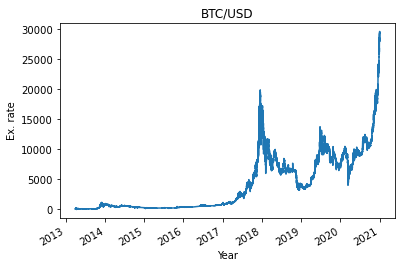

In [173]:
btc.close.plot()
plt.title('BTC/USD')
plt.xlabel('Year')
plt.ylabel('Ex. rate')
plt.show()

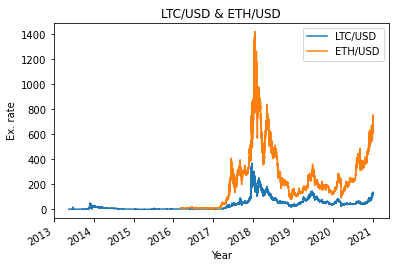

In [174]:
ltc.close.plot()
eth.close.plot()

plt.title('LTC/USD & ETH/USD')
plt.xlabel('Year')
plt.ylabel('Ex. rate')
plt.legend(['LTC/USD', 'ETH/USD'])
plt.show()
plt.show()

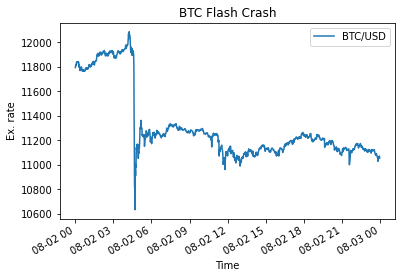

In [175]:
btc[btc.index.date == dt.date(2020,8,2)].close.plot()

plt.xlabel('Time')
plt.ylabel('Ex. rate')
plt.legend(['BTC/USD'])
plt.title('BTC Flash Crash')
plt.show()
plt.show()

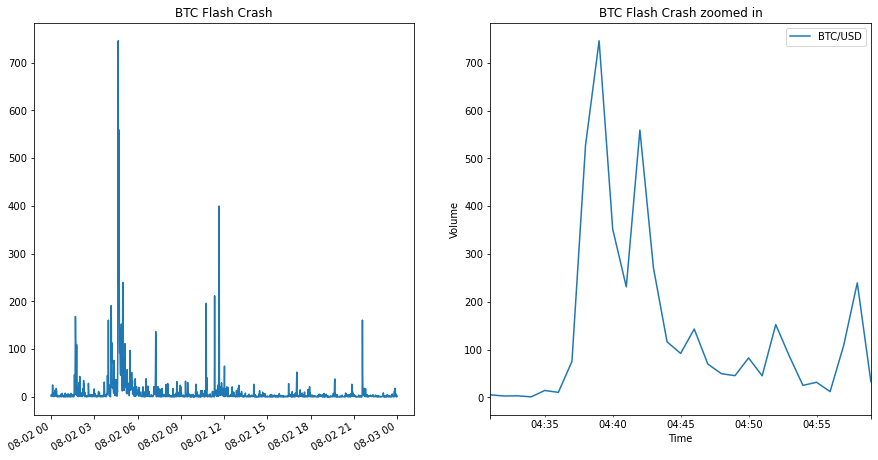

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,8))
ax = axes.flatten()

btc[btc.index.date == dt.date(2020,8,2)].volume.plot(figsize=(15,8), ax=ax[0])
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend(['BTC/USD'])
# plt.title('BTC Flash Crash')
ax[0].title.set_text('BTC Flash Crash')
# ax[0].set_axis_off()

btc[(btc.index.date == dt.date(2020,8,2)) & (btc.index.time > dt.time(4,30)) & (btc.index.time < dt.time(5,0))].volume.plot(ax=ax[1])

plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend(['BTC/USD'])
# plt.title('BTC Flash Crash zoomed in')
ax[1].title.set_text('BTC Flash Crash zoomed in')
# ax[1].set_axis_off()

plt.show()

In [5]:
btccap = btc.close * btc.volume
ltccap = ltc.close * ltc.volume
ethcap = eth.close * eth.volume

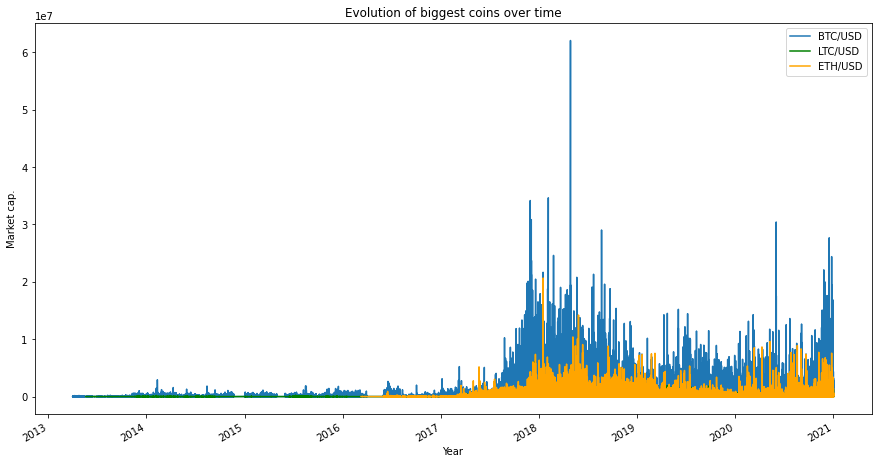

In [6]:
(btccap).plot(figsize=(15,8))
(ltccap).plot(color = 'green')
(ethcap).plot(color = 'orange')

plt.title('Evolution of biggest coins over time')
plt.xlabel('Year')
plt.ylabel('Market cap.')
plt.legend(['BTC/USD', 'LTC/USD', 'ETH/USD'])
plt.show()

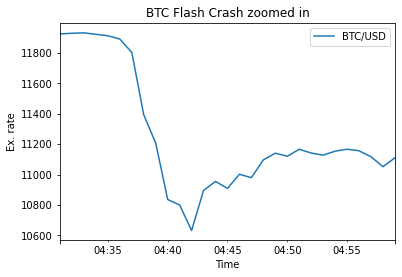

In [176]:
btc[(btc.index.date == dt.date(2020,8,2)) & (btc.index.time > dt.time(4,30)) & (btc.index.time < dt.time(5,0))].close.plot()

plt.xlabel('Time')
plt.ylabel('Ex. rate')
plt.legend(['BTC/USD'])
plt.title('BTC Flash Crash zoomed in')
plt.show()


In [2]:
# @dask.delayed
def label_data(flashcrash,
    timespan = 10, #minutes
    change = 0.1): #0.1 - 10% change

    crash = []

    for i in np.arange(sum(flashcrash.index <= flashcrash.index.max() - dt.timedelta(minutes = timespan))):

        if any(abs(flashcrash[(flashcrash.index < flashcrash.index[i] + dt.timedelta(minutes = timespan)) & (flashcrash.index >= flashcrash.index[i])].values.cumsum()) > change):
            crash.append(flashcrash.index[i])
    
    return crash

In [100]:
t0=time.time()
crash = label_data(flashcrash)
crashes = dask.compute(crash)
t1=time.time()
print('Runtime: %.2f s' %(t1-t0))

Runtime: 2853.33 s


In [4]:
dot = pd.read_csv('/media/alexander/AMR CHAMPER/FInBigData/archive/btcjpy.csv')

In [5]:
dot

,time,open,close,high,low,volume
0,1522338900000,7.870606e+05,7.870181e+05,7.870606e+05,7.870181e+05,0.020000
1,1522339620000,7.965120e+05,7.965120e+05,7.965120e+05,7.965120e+05,0.160000
2,1522342620000,7.967637e+05,7.967637e+05,7.967637e+05,7.967637e+05,0.067410
3,1522343340000,7.947851e+05,7.947851e+05,7.947851e+05,7.947851e+05,0.016220
4,1522343400000,7.960191e+05,7.963701e+05,7.963701e+05,7.960191e+05,0.051806
...,...,...,...,...,...,...
499372,1609513380000,3.025300e+06,3.023800e+06,3.025300e+06,3.023800e+06,0.006400
499373,1609513500000,3.028600e+06,3.030400e+06,3.030400e+06,3.028600e+06,0.003800
499374,1609513560000,3.030500e+06,3.032000e+06,3.032000e+06,3.030500e+06,0.003200
499375,1609513800000,3.031892e+06,3.031892e+06,3.031892e+06,3.031892e+06,0.010000


In [6]:
dot.index = pd.to_datetime(dot.time.values, unit='ms')


In [4]:
dot

,time,open,close,high,low,volume,Unnamed: 0
2020-08-21 19:22:00,1598037720000,3.0037,3.0000,3.0037,3.0000,368.278600,0.0
2020-08-21 19:28:00,1598038080000,3.0295,3.0295,3.0295,3.0295,50.000000,1.0
2020-08-21 20:27:00,1598041620000,3.0295,3.0295,3.0295,3.0295,398.860526,2.0
2020-08-21 20:41:00,1598042460000,3.0279,3.0279,3.0279,3.0279,35.000000,3.0
2020-08-21 21:17:00,1598044620000,2.9853,3.0000,3.0000,2.9853,1650.000000,4.0
...,...,...,...,...,...,...,...
2021-01-01 15:32:00,1609515120000,8.6499,8.6389,8.6499,8.6389,2838.507600,NaN
2021-01-01 15:33:00,1609515180000,8.6370,8.6186,8.6370,8.6186,115.733300,NaN
2021-01-01 15:34:00,1609515240000,8.6323,8.6259,8.6363,8.6259,1436.466242,NaN
2021-01-01 15:35:00,1609515300000,8.6100,8.5848,8.6100,8.5658,5780.054750,NaN


In [20]:
crashsetDOT = label_data(dot)


In [13]:
pd.DataFrame(crashsetDOT).to_csv("crashSetXLM.csv")

In [21]:
dot = pd.read_csv('/media/alexander/AMR CHAMPER/FInBigData/archive/eoseth.csv')
dot.index = pd.to_datetime(dot.time.values, unit='ms')
dot

,time,open,close,high,low,volume
2017-07-01 17:12:00,1498929120000,0.003260,0.004113,0.004113,0.003260,296.040000
2017-07-01 17:13:00,1498929180000,0.004113,0.004113,0.004113,0.004113,5293.960000
2017-07-01 17:15:00,1498929300000,0.003800,0.003800,0.003800,0.003800,100.000000
2017-07-01 17:16:00,1498929360000,0.003800,0.003800,0.003800,0.003800,4650.000000
2017-07-01 17:18:00,1498929480000,0.003700,0.003700,0.003700,0.003700,1111.000000
...,...,...,...,...,...,...
2021-01-01 14:50:00,1609512600000,0.003647,0.003647,0.003647,0.003647,0.881227
2021-01-01 14:54:00,1609512840000,0.003637,0.003637,0.003637,0.003637,85.130550
2021-01-01 14:59:00,1609513140000,0.003630,0.003630,0.003630,0.003630,281.476390
2021-01-01 15:02:00,1609513320000,0.003630,0.003630,0.003630,0.003630,17.213610


In [22]:
t0=time.time()
flashcrash = np.log(dot[(dot.index.date >= dt.date(2008,3,1)) & (dot.index.date <= dt.date(2021,1,1))].close).diff()[1:]
crash = label_data(flashcrash, timespan = 15, change = 0.02)
t1=time.time()
print('Runtime: %.2f s' %(t1-t0))
pd.DataFrame(crash).to_csv("/media/alexander/AMR CHAMPER/FInBigData/crashSet/crashSet" + 'eoseth' + ".csv")

Runtime: 962.54 s


In [11]:
def findCrashesMulti(fileList, coinName):
    for i in range(len(fileList)):
        print(fileList[i])
        coin = pd.read_parquet('/media/alexander/AMR CHAMPER/FInBigData/parquet/' + fileList[i])
        coin.index = pd.to_datetime(coin.time.values, unit='ms')
        flashcrash = np.log(coin[(coin.index.date >= dt.date(2008,3,1)) & (coin.index.date <= dt.date(2021,1,1))].close).diff()[1:]
        crash = label_data(flashcrash, timespan = 15, change = 0.02)
        pd.DataFrame(crash).to_csv("/media/alexander/AMR CHAMPER/FInBigData/crashSet/crashSet" + coinName[i].upper() + ".csv")

In [6]:
universeUsd = pd.read_csv('universeUsd.csv')
universeUsd

,Unnamed: 0,parquetFile,fileName,coinTag,pairedCurr,coefVariation,meanC,stdDevC,meanVol
0,1,absusd.gzip,absusd.csv,abs,usd,0.605516,0.018882,0.011433,3604.459952
1,3,adausd.gzip,adausd.csv,ada,usd,0.227688,0.131406,0.029920,7122.491992
2,5,agiusd.gzip,agiusd.csv,agi,usd,0.628557,0.108121,0.067961,3476.987196
3,6,aiousd.gzip,aiousd.csv,aio,usd,1.161514,0.845182,0.981691,803.656881
4,8,algusd.gzip,algusd.csv,alg,usd,0.652104,0.366535,0.239019,2097.918097
...,...,...,...,...,...,...,...,...,...
160,313,zbtusd.gzip,zbtusd.csv,zbt,usd,0.142665,0.292791,0.041771,91.292535
161,314,zcnusd.gzip,zcnusd.csv,zcn,usd,0.671718,0.205105,0.137773,1693.812861
162,316,zecusd.gzip,zecusd.csv,zec,usd,0.855806,188.937414,161.693726,24.965549
163,317,zilusd.gzip,zilusd.csv,zil,usd,0.679283,0.028332,0.019246,13141.220877


In [18]:
topCoins = ['btc', 'eth', 'ada', 'ust', 'usdt', 'xlm', 'xrp', 'ltc', 'dot']
universeUsd = universeUsd[~universeUsd.coinTag.isin(topCoins)].reset_index()
universeUsd

,index,Unnamed: 0,parquetFile,fileName,coinTag,pairedCurr,coefVariation,meanC,stdDevC,meanVol
0,0,1,absusd.gzip,absusd.csv,abs,usd,0.605516,0.018882,0.011433,3604.459952
1,2,5,agiusd.gzip,agiusd.csv,agi,usd,0.628557,0.108121,0.067961,3476.987196
2,3,6,aiousd.gzip,aiousd.csv,aio,usd,1.161514,0.845182,0.981691,803.656881
3,4,8,algusd.gzip,algusd.csv,alg,usd,0.652104,0.366535,0.239019,2097.918097
4,5,12,ampusd.gzip,ampusd.csv,amp,usd,0.374206,1.051022,0.393299,496.125322
...,...,...,...,...,...,...,...,...,...,...
152,160,313,zbtusd.gzip,zbtusd.csv,zbt,usd,0.142665,0.292791,0.041771,91.292535
153,161,314,zcnusd.gzip,zcnusd.csv,zcn,usd,0.671718,0.205105,0.137773,1693.812861
154,162,316,zecusd.gzip,zecusd.csv,zec,usd,0.855806,188.937414,161.693726,24.965549
155,163,317,zilusd.gzip,zilusd.csv,zil,usd,0.679283,0.028332,0.019246,13141.220877


In [13]:

fileDummy = ['absusd.gzip', 'algusd.gzip', 'antusd.gzip']
coinNameDummy = ['ABS', 'ALG', 'ANT']

In [17]:
universeUsd.parquetFile

0      absusd.gzip
2      agiusd.gzip
3      aiousd.gzip
4      algusd.gzip
5      ampusd.gzip
          ...     
160    zbtusd.gzip
161    zcnusd.gzip
162    zecusd.gzip
163    zilusd.gzip
164    zrxusd.gzip
Name: parquetFile, Length: 157, dtype: object

In [19]:
findCrashesMulti(universeUsd.parquetFile, universeUsd.coinTag)

absusd.gzip
agiusd.gzip
aiousd.gzip
algusd.gzip
ampusd.gzip
antusd.gzip
astusd.gzip
atousd.gzip
aucusd.gzip
avaxusd.gzip
avtusd.gzip
b21xusd.gzip
balusd.gzip
bandusd.gzip
batusd.gzip
bchabcusd.gzip
bchnusd.gzip
bftusd.gzip
bntusd.gzip
boxusd.gzip
bsvusd.gzip
btgusd.gzip
btseusd.gzip
bttusd.gzip
cbtusd.gzip
chzusd.gzip
clousd.gzip
cndusd.gzip
cnnusd.gzip
compusd.gzip
ctxusd.gzip
daiusd.gzip
dappusd.gzip
datusd.gzip
dgbusd.gzip
dgxusd.gzip
dogusd.gzip
drnusd.gzip
dshusd.gzip
dtausd.gzip
dtxusd.gzip
duskusd.gzip
edousd.gzip
egldusd.gzip
elfusd.gzip
enjusd.gzip
eosdtusd.gzip
eosusd.gzip


KeyboardInterrupt: 

In [1]:
def compute_R(events,tau_max=1000,dtau=1):
    taus=range(1,tau_max,dtau)
    events_mid_shifted=events["mid"]
    R=[]
    R_plus=[]
    R_minus=[]
    for tau in taus:
        events_mid_shifted=events_mid_shifted.shift(dtau)
        R.append(np.nanmean(-events["s"]*(events_mid_shifted-events["mid"])))  # - sign instead of shift(-dtau)
    return np.array(R)

In [ ]:
coarse_factor=5
events_06["dt"]=coarse_factor*((events_06.index.hour*60+events_06.index.minute)//coarse_factor)/60                            # chunks of 15 minutes
R_06_dt=events_06[["s","mid"]].groupby(events_06["dt"]).apply(compute_R,tau_max=10)
R_06_dt_plus=events_06[["s","mid"]][events_06["s"]>0].groupby(events_06["dt"]).apply(compute_R,tau_max=10)
R_06_dt_minus=events_06[["s","mid"]][events_06["s"]<0].groupby(events_06["dt"]).apply(compute_R,tau_max=10)

In [5]:
R_06_dt=dot[['high', 'low']].apply(compute_R,tau_max=10)

KeyError: 'mid'

In [3]:
import pandas
from math import *
import math
import numpy as np

def std(list):
    element = 0 
    for item in list:
        element = element + float((item**2)/( len(list)))
    return math.sqrt(element)

def phi(x):
    #'Cumulative distribution function for the standard normal distribution'
    return (1.0 + erf(x / sqrt(2.0))) / 2.0

def calx(v_i,delta_p_i,sigma):
    x = v_i * phi(delta_p_i/sigma)
    return x

In [84]:
df = btc

In [86]:
btc.head()

,time,open,close,high,low,volume,ticker
2013-04-01 00:07:00,1364774820000,93.25,93.30,93.30,93.25,93.300000,BTCUSD
2013-04-01 00:08:00,1364774880000,100.00,100.00,100.00,100.00,93.300000,BTCUSD
2013-04-01 00:09:00,1364774940000,93.30,93.30,93.30,93.30,33.676862,BTCUSD
2013-04-01 00:11:00,1364775060000,93.35,93.47,93.47,93.35,20.000000,BTCUSD
2013-04-01 00:12:00,1364775120000,93.47,93.47,93.47,93.47,2.021627,BTCUSD


In [91]:
df.index.dat

array([datetime.time(0, 7), datetime.time(0, 8), datetime.time(0, 9), ...,
       datetime.time(15, 7), datetime.time(15, 8), datetime.time(15, 9)],
      dtype=object)

In [93]:
high = df["high"].tolist()
low = df["low"].tolist()
vol = df["volume"].tolist()
date = df.index.date.tolist()
time = df.index.time.tolist()
sigma = np.std(df.close) #calculate standard deviation
totalvol = sum(vol)

In [95]:
dateset = tuple(set(date))
vpin=[]
for eachdate in dateset:
    dateslice = df[np.logical_not(df != eachdate)]
    datevol = dataslice['vol'].sum()
    vbs = datevol/50
    
    '''list to store results'''
    delta_p_i = []
    v_i = []
    x=[]
    
    '''convert slice to list'''
    highslice = dateslice["high"].tolist()
    lowslice = dateslice["low"].tolist()
    volslice = dateslice["vol"].tolist()
    
    '''generate basket'''
    highbas=[]
    lowbas=[]
    volbas=[]
    
    '''start filling basket'''
    for i in range(len(dateslice.index)):
        highbas.append(highslice[i])
        lowbas.append(lowslice[i])
        volbas.append(volslice[i])
        '''pop last element if vol exceeds.'''
        if sum(volbas) > vbs:
            v_i.append(sum(volbas[0:-1]))  
            delta_p_i.append(abs(max(highbas)-min(lowbas)))
            highbas = highbas[-1:] 
            lowbas = lowbas[-1:]
            volbas = volbas[-1:]
    for i in range(len(v_i)):
        x.append(calx(v_i[i],delta_p_i[i],sigma))
    v_tau_b=sum(x)
    dateitem= abs(2*v_tau_b - vbs)
    vpin.append(dateitem/totalvol)

KeyError: 'date'